#ML4Net - Lab 3

## Team members

Marc Mallol 268923 | Jordi Esteve 268829 | Albert Jané 268537

## Description

In this lab, you will train a time series forecaster using Federated Learning (FL).

The dataset you are going to use contains data from multiple APs. In particular, each AP's dataset contains the following features:

* `datetime` is the timestamp (date) at which the measurement was taken
* `Bytes` is the number of Bytes contributed at the corresponding datetime
* `Active Connections` is the number of active connections (users connected to the AP) at the corresponding datetime
* `Active Users` is the number of active users at the corresponding datetime
* `AP ID` is the ID of the AP where the measurement was taken

Original dataset: Chen, W., Lyu, F., Wu, F., Yang, P., & Ren, J. (2021). Flag: Flexible, accurate, and long-time user load prediction in large-scale WiFi system using deep RNN. IEEE Internet of Things Journal, 8(22), 16510-16521.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   **Submission deadline: 8 June 2025 (EoB).**

## Setting up the environment

In [36]:
import os
import urllib.request

dataset_url = "https://github.com/fwilhelmi/fwilhelmi.github.io/raw/master/files/datasetLab3.pkl"
dataset_path = "datasetLab3.pkl"

if not os.path.exists(dataset_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(dataset_url, dataset_path)
    print("Download complete.")
else:
    print("Dataset already exists:", dataset_path)

Dataset already exists: datasetLab3.pkl


## Loading the data




Load the data from the pickle file (https://docs.python.org/3/library/pickle.html) that contains the dataset.

**Important:** If you have issues with the dataset after automatically downloading and extracting it, download it and move it manually to the indicated folder.

In [37]:
import pickle
import os

print(os.getcwd())
print(os.path.exists('datasetLab3.pkl'))

try:
    with open('datasetLab3.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    print("Data loaded successfully:")
    print(loaded_data)
except FileNotFoundError:
    print("Error: 'datasetLab3.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/mnt/c/Users/Marc/Documents/Uni/3r/3r Trimestre/MLNetworks/Labs/ML4Net-2025/Lab3
True
Data loaded successfully:
                     Bytes  Active Connections  Active Users   AP ID
datetime                                                            
2019-04-30 07:10:00    0.0            0.075209           0.0  7-1012
2019-04-30 07:20:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:30:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:40:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:50:00    0.0            0.000000           0.0  7-1012
...                    ...                 ...           ...     ...
2019-05-14 07:10:00    0.0            0.000000           0.0   7-104
2019-05-14 07:20:00    0.0            0.000000           0.0   7-104
2019-05-14 07:30:00    0.0            0.000000           0.0   7-104
2019-05-14 07:40:00    0.0            0.000000           0.0   7-104
2019-05-14 07:50:00    0.0            0.034091           0.0

First we can explore the data before jumping straight to the exercises

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(loaded_data)

display(loaded_data)  

,Bytes,Active Connections,Active Users,AP ID
datetime,,,,
2019-04-30 07:10:00,0.0,0.075209,0.0,7-1012
2019-04-30 07:20:00,0.0,0.000000,0.0,7-1012
2019-04-30 07:30:00,0.0,0.000000,0.0,7-1012
2019-04-30 07:40:00,0.0,0.000000,0.0,7-1012
2019-04-30 07:50:00,0.0,0.000000,0.0,7-1012
...,...,...,...,...
2019-05-14 07:10:00,0.0,0.000000,0.0,7-104
2019-05-14 07:20:00,0.0,0.000000,0.0,7-104
2019-05-14 07:30:00,0.0,0.000000,0.0,7-104


In [39]:
display(df.describe())

,Bytes,Active Connections,Active Users
count,2.110640e+05,211064.000000,211064.000000
mean,3.693131e+04,1.582982,1.200613
std,1.441261e+05,4.446037,3.739401
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000
75%,2.680175e+03,1.353333,1.000000
max,3.993286e+06,103.780000,79.000000


In [40]:
display(df['AP ID'].unique())

array(['7-1012', '7-1013', '7-1021', '7-1043', '7-1019', '7-1071',
       '7-1113', '7-1048', '7-1101', '7-1026', '7-1129', '7-112', '7-100',
       '7-111', '7-1030', '7-1117', '7-1126', '7-1099', '7-1052',
       '7-1087', '7-108', '7-1022', '7-1018', '7-1059', '7-1054', '7-110',
       '7-1058', '7-1094', '7-1064', '7-102', '7-1044', '7-1002',
       '7-1096', '7-1014', '7-1082', '7-1088', '7-1106', '7-1063',
       '7-1114', '7-1137', '7-1004', '7-1045', '7-1125', '7-1036',
       '7-1124', '7-1034', '7-1083', '7-1072', '7-1033', '7-1069',
       '7-1127', '7-1005', '7-1130', '7-1047', '7-1020', '7-1066',
       '7-1039', '7-1134', '7-1003', '7-1120', '7-1131', '7-1009',
       '7-1084', '7-1074', '7-1062', '7-1025', '7-1089', '7-1098',
       '7-1006', '7-1139', '7-10', '7-1133', '7-1060', '7-1032', '7-106',
       '7-1057', '7-101', '7-1102', '7-1085', '7-1053', '7-107', '7-1121',
       '7-1023', '7-1097', '7-1050', '7-1037', '7-11', '7-1136', '7-1040',
       '7-1015', '7-1079'

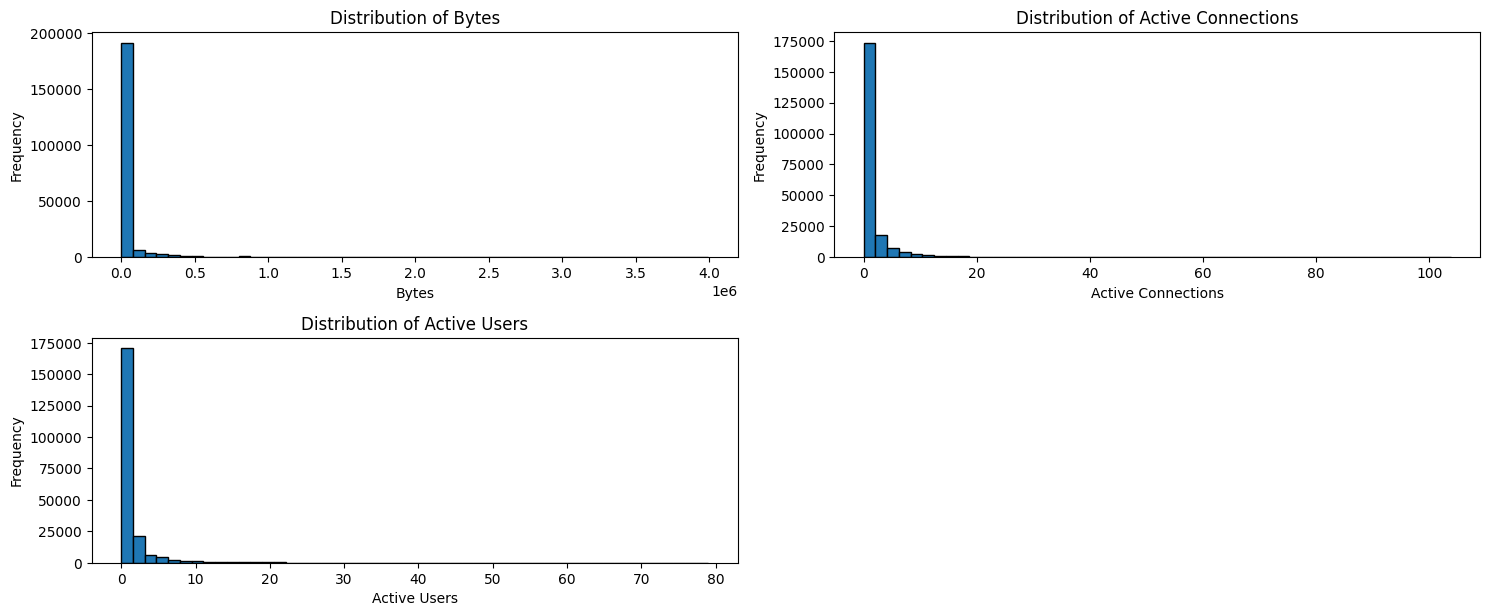

In [41]:
columns_to_plot = [ 'Bytes', 'Active Connections', 'Active Users']

plt.figure(figsize=(15, 15))  # Set the figure size (width, height) in inches

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(5, 2, i)
    plt.hist(df[col], bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Comment

We know this is not an exercise, but it is interesting and useful to see how data is structured and given tu us, in order to make our decissions better


## EXERCISES

### Exercise 1:

Analyze the data from the different APs and discuss their properites (stationarity, trends, seasonality).

Select 2 or 3 key APs showing different properties and generate:

* Line plots (to plot the load vs the time)
* Autocorrelation plots (to show the relationship between past and future samples of the load)
* An Augmented Dickey-Fuller test (to study the stationarity of the AP)



,Bytes,Active Connections,Active Users,AP ID
datetime,,,,
2019-04-30 07:10:00,0.00000,0.075209,0.00,7-1012
2019-04-30 07:20:00,0.00000,0.000000,0.00,7-1012
2019-04-30 07:30:00,0.00000,0.000000,0.00,7-1012
2019-04-30 07:40:00,0.00000,0.000000,0.00,7-1012
2019-04-30 07:50:00,0.00000,0.000000,0.00,7-1012
...,...,...,...,...
2019-05-14 15:30:00,46044.64200,5.000000,3.00,7-1012
2019-05-14 15:40:00,46044.64200,4.753333,3.00,7-1012
2019-05-14 15:50:00,25478.03524,2.660000,1.66,7-1012


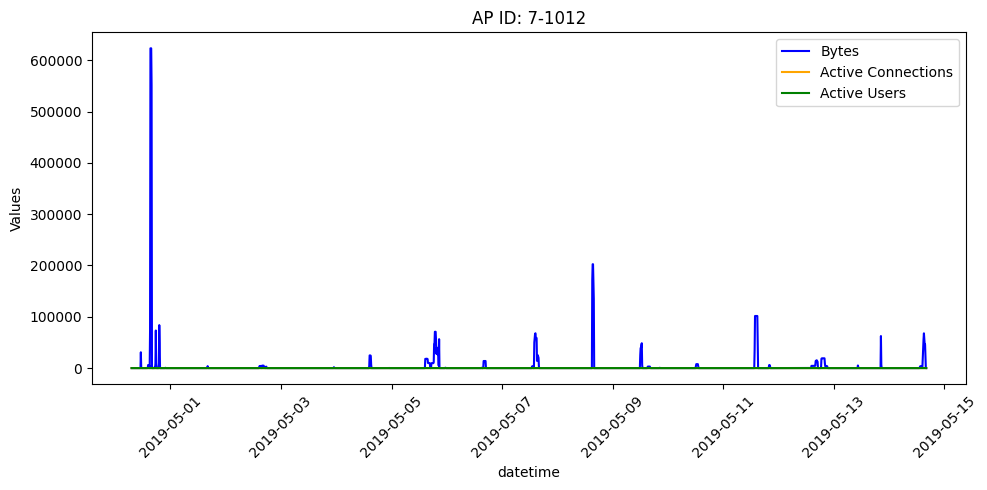

,Bytes,Active Connections,Active Users,AP ID
datetime,,,,
2019-04-29 23:40:00,135931.64300,1.000000,1.000000,7-1013
2019-04-29 23:50:00,135931.64300,1.000000,1.000000,7-1013
2019-04-30 00:00:00,135931.64300,1.000000,1.000000,7-1013
2019-04-30 00:10:00,135931.64300,1.000000,1.000000,7-1013
2019-04-30 00:20:00,135931.64300,1.000000,1.000000,7-1013
...,...,...,...,...
2019-05-14 22:30:00,60.65776,0.106667,0.053333,7-1013
2019-05-14 22:40:00,0.00000,0.000000,0.000000,7-1013
2019-05-14 22:50:00,0.00000,0.000000,0.000000,7-1013


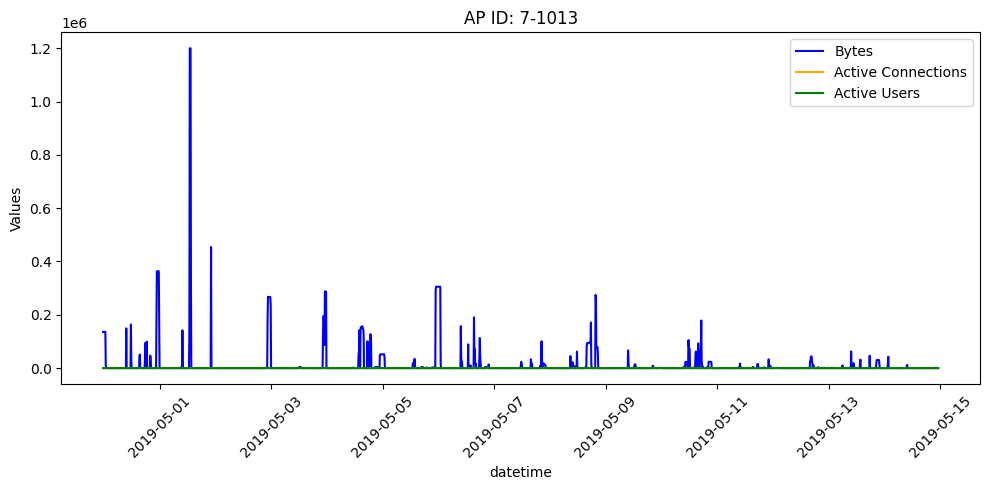

,Bytes,Active Connections,Active Users,AP ID
datetime,,,,
2019-04-30 06:30:00,0.0,0.099010,0.0,7-1021
2019-04-30 06:40:00,0.0,0.000000,0.0,7-1021
2019-04-30 06:50:00,0.0,0.000000,0.0,7-1021
2019-04-30 07:00:00,0.0,0.000000,0.0,7-1021
2019-04-30 07:10:00,0.0,0.000000,0.0,7-1021
...,...,...,...,...
2019-05-14 19:00:00,0.0,0.000000,0.0,7-1021
2019-05-14 19:10:00,0.0,0.000000,0.0,7-1021
2019-05-14 19:20:00,0.0,0.000000,0.0,7-1021


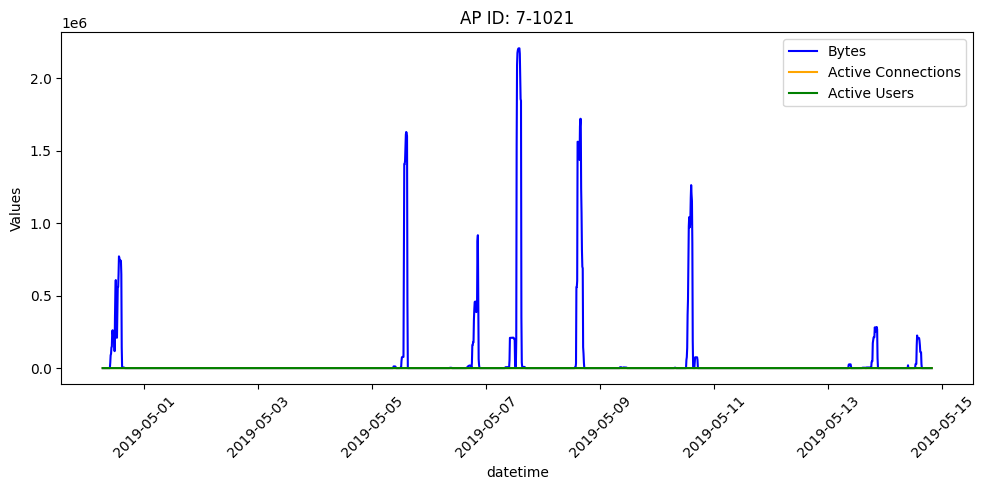

In [42]:
# (response to exercise 1)

selected_APs= df['AP ID'].unique()[:3]  # Select first 3 AP IDs
for ap_id in selected_APs:
    ap_data = df[df['AP ID'] == ap_id]
    display(ap_data)
    plt.figure(figsize=(10, 5))
    plt.plot(ap_data.index, ap_data['Bytes'], label='Bytes', color='blue')
    plt.plot(ap_data.index, ap_data['Active Connections'], label='Active Connections', color='orange')
    plt.plot(ap_data.index, ap_data['Active Users'], label='Active Users', color='green')
    plt.title(f'AP ID: {ap_id}')
    plt.xlabel('datetime')
    plt.ylabel('Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

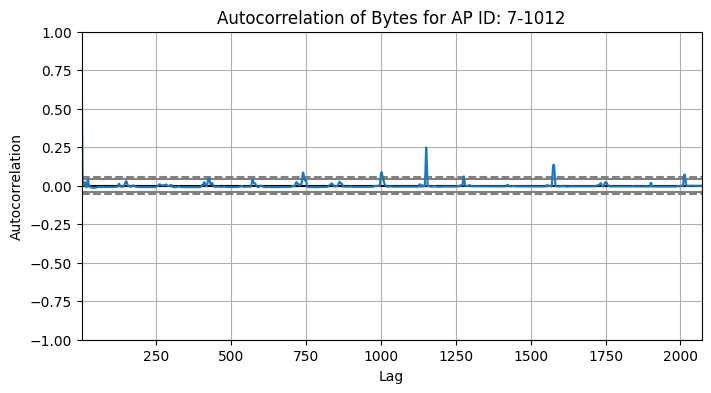

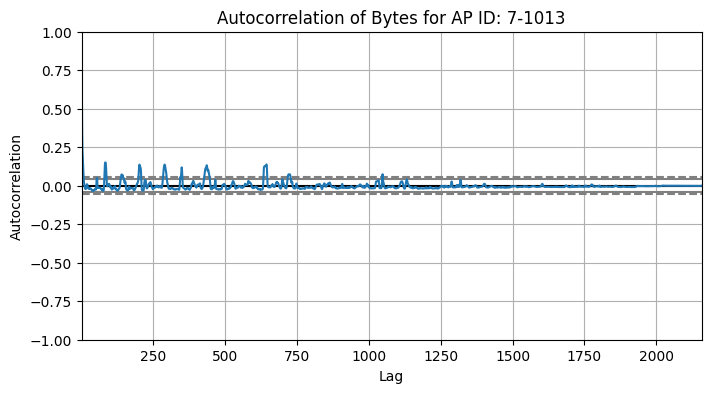

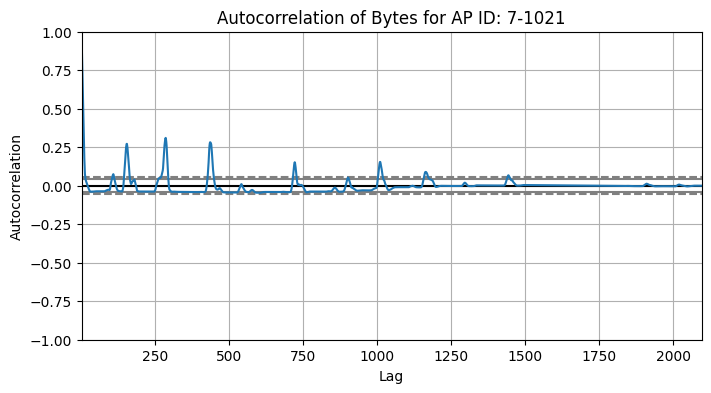

In [43]:
from pandas.plotting import autocorrelation_plot
# Alternatively, for more control:
# from statsmodels.graphics.tsaplots import plot_acf

for ap_id in selected_APs:
    ap_data = df[df['AP ID'] == ap_id]
    plt.figure(figsize=(8, 4))
    autocorrelation_plot(ap_data['Bytes'])
    plt.title(f'Autocorrelation of Bytes for AP ID: {ap_id}')
    plt.show()
    
    # # If you want to use statsmodels for more lags:
    # plot_acf(ap_data['Bytes'], lags=50)
    # plt.title(f'Autocorrelation of Bytes for AP ID: {ap_id}')
    # plt.show()

In [44]:
from statsmodels.tsa.stattools import adfuller

for ap_id in selected_APs:
    ap_data = df[df['AP ID'] == ap_id]
    print(f"\nADF Test for AP ID: {ap_id}")
    result = adfuller(ap_data['Bytes'].dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"Critical Value {key}: {value:.4f}")
    if result[1] < 0.05:
        print("=> The series is likely stationary.")
    else:
        print("=> The series is likely non-stationary.")


ADF Test for AP ID: 7-1012
ADF Statistic: -8.0108
p-value: 0.0000
Critical Value 1%: -3.4336
Critical Value 5%: -2.8630
Critical Value 10%: -2.5675
=> The series is likely stationary.

ADF Test for AP ID: 7-1013
ADF Statistic: -14.6033
p-value: 0.0000
Critical Value 1%: -3.4334
Critical Value 5%: -2.8629
Critical Value 10%: -2.5675
=> The series is likely stationary.

ADF Test for AP ID: 7-1021
ADF Statistic: -8.8701
p-value: 0.0000
Critical Value 1%: -3.4335
Critical Value 5%: -2.8629
Critical Value 10%: -2.5675
=> The series is likely stationary.


### Exercise 2:

Prepare the data to be presented as a time series to the ML model. For that, you will have to split features from samples by differentiating between an observation window (e.g., 10 samples) and a prediction window (e.g., 2 samples). Use a sliding window to iterate over all the samples.

Example: For an array [0,1,2,3,4,5], using an observation window $T_o$ = 3 and a prediction window $T_p$ = 1 would lead to the following time series data:
* $x_1$ = [0,1,2], $y_1$ = [3]
* $x_2$ = [1,2,3], $x_2$ = [4]
* $x_3$ = [2,3,4], $y_3$ = [5]

(where x are the features and y the labels)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["Bytes", "Active Connections", "Active Users"]] = scaler.fit_transform(
    df[["Bytes", "Active Connections", "Active Users"]]
)

In [46]:
# Parameters
T_o = 3  # Observation window
T_p = 1   # Prediction window

# Choose features and target columns
feature_cols = ['Bytes', 'Active Connections', 'Active Users']
target_col = 'Bytes'

X_list = []
y_list = []

# Sort by datetime if needed (if index is datetime)
df_sorted = df.sort_index()

for ap_id in df_sorted['AP ID'].unique():
    ap_data = df_sorted[df_sorted['AP ID'] == ap_id]
    ap_data_feat = ap_data[feature_cols].values
    ap_data_target = ap_data[target_col].values
    for i in range(len(ap_data) - T_o - T_p + 1):
        X_list.append(ap_data_feat[i:i+T_o])
        y_list.append(ap_data_target[i+T_o:i+T_o+T_p])

X = np.array(X_list)  # shape: (samples, T_o, num_features)
y = np.array(y_list)  # shape: (samples, T_p)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (210764, 3, 3)
y shape: (210764, 1)


### Exercise 3:

Split the time series data into train, test, and validation, based on your criteria.

In [47]:
# (response to exercise 3)

# We will split the data into training 60%, validation 20%, and test 20% sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (126458, 3, 3) (126458, 1)
Validation set shape: (42153, 3, 3) (42153, 1)
Test set shape: (42153, 3, 3) (42153, 1)


### Exercise 4:
Define a model (e.g., GRU, LSTM, CNN, Transformer) able to receive the time series the data you generated in the previous exercise.

In [48]:
# (response to exercise 4)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import regularizers

def create_lstm_model(input_shape):
    model = models.Sequential()
    model.add(layers.LSTM(128,
                         return_sequences=True,
                         # add dropout on inputs and on recurrent state
                         dropout=0.1,
                         # L2 on the kernels
                         kernel_regularizer=regularizers.l2(1e-6),
                         input_shape=input_shape))
    model.add(layers.LSTM(64,
                         dropout=0.1,
                         kernel_regularizer=regularizers.l2(1e-6)))
    model.add(layers.Dense(32,
                           activation='relu',
                           kernel_regularizer=regularizers.l2(1e-6)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(1e-2),
                  loss='mse')
    return model


### Exercise 5:

Train your model following two approaches:
1. **Centralized model training:** Mix data from multiple APs to train the model in a centralized fashion.
2. **Federated model training:** Consider APs as independent clients who contribute to training a global model by submitting local model updates.

Show the results by calculating the following metrics from the de-normalized data:
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Mean absolute percentage error (MAPE)

In [49]:
# (response to exercise 5)

# Create the model centralized around the LSTM architecture
model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
# Train the model
callbacks = [
    keras.callbacks.EarlyStopping('val_loss', patience=20, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau('val_loss', factor=0.5, patience=5)
]

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    callbacks=callbacks)
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")



Epoch 1/100


/home/marc/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3952/3952 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.2480 - val_loss: 0.1091 - learning_rate: 0.0100
Epoch 2/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 0.2181 - val_loss: 0.1463 - learning_rate: 0.0100
Epoch 3/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.1770 - val_loss: 0.1208 - learning_rate: 0.0100
Epoch 4/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.1826 - val_loss: 0.1156 - learning_rate: 0.0100
Epoch 5/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.1877 - val_loss: 0.1037 - learning_rate: 0.0100
Epoch 6/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.1721 - val_loss: 0.1157 - learning_rate: 0.0100
Epoch 7/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.1882 - val_loss: 0.0935 - learning_rate: 0.0100
Epoch 8/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.1798 - val_loss: 0.1455 - learning_rate: 0.0100
Epoch 9/100
3952/3952 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.1950 - val_loss: 0.1183 - learning

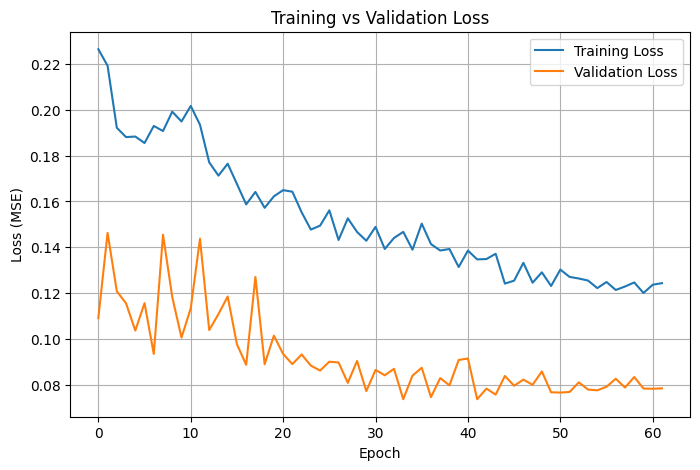

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
from sklearn.metrics import r2_score

# Predict on test set
y_pred = model.predict(X_test)

# If y is 2D (e.g., (samples, T_p)), compute R² for each output
if y_pred.shape[1] == 1 or len(y_pred.shape) == 1:
    r2 = r2_score(y_test, y_pred)
    print(f"R² score: {r2:.4f}")
else:
    for i in range(y_pred.shape[1]):
        r2 = r2_score(y_test[:, i], y_pred[:, i])
        print(f"R² score for output {i}: {r2:.4f}")

1318/1318 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
R² score: 0.9212


### Exercise 6 (EXTRA):

Reconsider your design to improve the accuracy of your model. For that, you can find a better approach to split the data (e.g., using larger observation windows) and include additional features.

In [52]:
# (response to exercise 6)